# Análisis y Visualización de Datos
## Trabajo práctico entregable - Grupo 30: Di Bartolo, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Lectura del dataset](#Dataset)
* [Ejercicio 3](#Ejercicio3)

#### Librerías externas <a class="anchor" id="Libs"></a>
---

Empezamos cargando librerías que vamos a usar en la resolución del ejercicio.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn
import math
import numpy as np

#### Lectura del dataset <a class="anchor" id="Dataset"></a>
---

Cargamos el dataset original y eliminamos los valores extremos (el 5% que menos y más tenga de salario neto).

In [5]:
# Url donde está alojado el dataset.
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'

# Lectura del dataset.
df = pd.read_csv(url)

# Limpiando valores extremos.
df = df[df["salary_monthly_NETO"] > df["salary_monthly_NETO"].quantile(5/100)]
df = df[df["salary_monthly_NETO"] < df["salary_monthly_NETO"].quantile(95/100)]

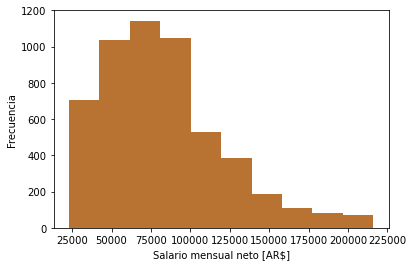

In [6]:
# Graficando.
plt.hist(df["salary_monthly_NETO"],10,color="#B87333")
plt.xlabel("Salario mensual neto [AR$]")
plt.ylabel("Frecuencia")
plt.show()

### Ejercicio 3 - Estimación <a class="anchor" id="Ejercicio3"></a>

Calcular una estimación puntual y un intervalo de confianza de nivel ( $1-\alpha$ ) para la resta entre la *Media del salario Neto para Hombres* y la *Media del salario Neto para Otros géneros* (diferencia de las medias entre el grupoA y grupoB). 

**¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?**

Primero volvamos a ver qué opciones tenemos en el campo del género de la encuesta.

In [7]:
print("Las opciones posibles en profile_gender son: ",df['profile_gender'].unique()[0],", ",df['profile_gender'].unique()[1]," y ",df['profile_gender'].unique()[2] , ".\n",sep="")

Las opciones posibles en profile_gender son: Mujer, Hombre y Otros.



Ahora obtengamos los salarios netos promedios según el género, ordenados según quien gana más.

In [8]:
print("El salario promedio de los hombres es:         $",round(df.groupby(["profile_gender"],dropna=False)["salary_monthly_NETO"].mean()[0]))
print("El salario promedio de los otros géneros es:   $",round(df.groupby(["profile_gender"],dropna=False)["salary_monthly_NETO"].mean()[2]))
print("El salario promedio de las mujeres es:         $",round(df.groupby(["profile_gender"],dropna=False)["salary_monthly_NETO"].mean()[1]))

El salario promedio de los hombres es:         $ 84483
El salario promedio de los otros géneros es:   $ 80260
El salario promedio de las mujeres es:         $ 74147


Es interesante ver una tabla que describa otras medidas de centralidad y dispersión:

In [15]:
df[["profile_gender","salary_monthly_NETO"]].groupby("profile_gender").describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      4442.0  84482.957461  38027.585794  22980.0   
Mujer                        830.0  74147.199506  33582.707710  23000.0   
Otros                         25.0  80260.000000  44573.628227  34000.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          55000.0  80000.0  105000.0  216000.0  
Mujer           49125.0  67846.0   92810.5  203000.0  
Otros           40000.0  74000.0  101000.0  190000.0

Armemos los grupos A (salarios netos de hombres) y B (salarios netos de no hombres).

In [16]:
groupA = df[df["profile_gender"] == "Hombre"].salary_monthly_NETO
groupB = df[df["profile_gender"] != "Hombre"].salary_monthly_NETO 

Ahora comparemos las medias:

In [18]:
print("La media del salario mensual neto de los hombres es de:               $", round(groupA.mean()))
print("La media del salario mensual neto de los no hombres es de:            $", round(groupB.mean()))
print("")
print("La diferencia de las medias de salario mensual neto es entonces de:   $", round(round(groupA.mean())-round(groupB.mean())))

La media del salario mensual neto de los hombres es de:               $ 84483
La media del salario mensual neto de los no hombres es de:            $ 74326

La diferencia de las medias de salario mensual neto es entonces de:   $ 10157


Vamos a calcular el intervalo en el cual se encuentra la media de los hombres y no hombres con un 95\% de confianza.

Esto implica que usaremos un $\alpha = 0.05$.

Tendremos un valor de Z inferior y superior:
- $z_{0.025}$ = -1.96
- $z_{0.975}$ = 1.96

In [24]:
# Definición de los z valores.
z_0025 = -1.96
z_0975 = 1.96

# Grupo A.
N_A = len(groupA)
mean_A = groupA.mean()
std_A = groupA.std()
lim_inf_A = mean_A + std_A * z_0025 / N_A**0.5
lim_sup_A = mean_A + std_A * z_0975 / N_A**0.5

# Grupo B.
N_B = len(groupB)
mean_B = groupB.mean()
std_B = groupB.std()
lim_inf_B = mean_B + std_B * z_0025 / N_B**0.5
lim_sup_B = mean_B + std_B * z_0975 / N_B**0.5

print("La media del salario neto de los hombres estará, con un 95% de confianza, entre $",round(lim_inf_A),"y $",round(lim_sup_A))
print("La media del salario neto de los no hombres estará, con un 95% de confianza, entre $",round(lim_inf_B),"y $",round(lim_sup_B))

La media del salario neto de los hombres estará, con un 95% de confianza, entre $ 83365 y $ 85601
La media del salario neto de los no hombres estará, con un 95% de confianza, entre $ 72051 y $ 76601


De esta manera, podemos pensar que la diferencia entre las medias estará, con un 95% de confianza, entre la diferencia más chica y más grande posible de las medias de los grupos A y B.

In [28]:
print("La diferencia de las medias del salario mensual neto estará, con un 95% de confianza, entre $",\
     round(lim_inf_A - lim_sup_B),"y $", round(lim_sup_A - lim_inf_B))

La diferencia de las medias del salario mensual neto estará, con un 95% de confianza, entre $ 6764 y $ 13550


En cuanto a la relación de estos intervalos de confianza respecto a los test de hipótesis, podemos afirmar viendo estos datos que, con un 95% de confianza, **los hombres ganan más que los no hombres**.